## Цель проекта

Коронавирус застал мир врасплох, изменив привычный порядок вещей. На какое-то время жители городов перестали выходить на улицу, посещать кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы моей компании и купили крупный сервис для чтения книг по подписке.

Задача — проанализировать базу данных.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## База данных

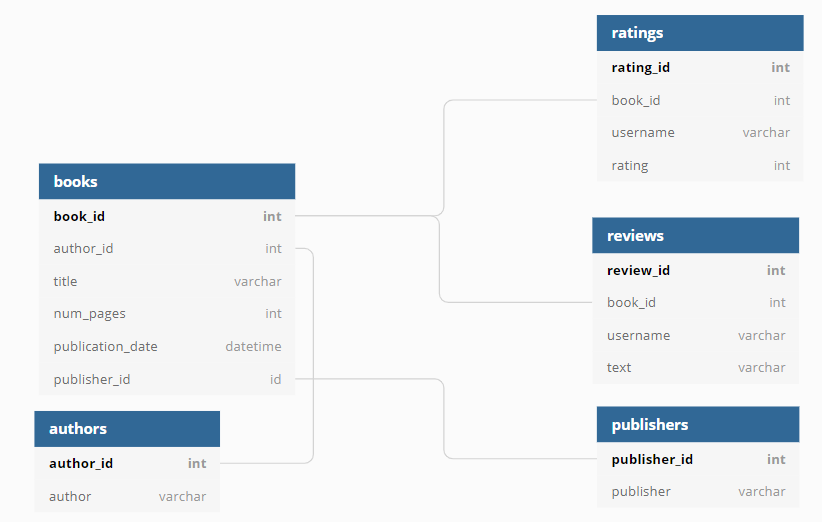

## Задания

1) Посчитать, сколько книг вышло после 1 января 2000 года;

2) Для каждой книги посчитать количество обзоров и среднюю оценку;

3) Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;

4) Определить автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками;

5) Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

## Исследование таблиц

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
query = '''SELECT * 
           FROM books 
           LIMIT 5
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Таблица books содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

In [3]:
query = '''SELECT * 
           FROM authors 
           LIMIT 5
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица authors содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

In [4]:
query = '''SELECT * 
           FROM publishers
           LIMIT 5
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица publishers содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

In [5]:
query = '''SELECT * 
           FROM ratings
           LIMIT 5
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Таблица ratings содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

In [6]:
query = '''SELECT * 
           FROM reviews
           LIMIT 5
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Таблица reviews содержит данные о пользовательских обзорах:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора

## Решение заданий

### Посчитать, сколько книг вышло после 1 января 2000 года

In [7]:
query = '''SELECT COUNT(book_id)
           FROM books
           WHERE publication_date > '2000-01-01'
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,count
0,819


После 1 января 2000 года вышло 819 книг.

### Для каждой книги посчитать количество обзоров и среднюю оценку

In [8]:
query = '''SELECT b.title AS book_title,
                  b.book_id AS book_id,
                  COUNT(DISTINCT rev.review_id),
                  AVG(rat.rating)
           FROM books AS b
           LEFT JOIN ratings AS rat ON b.book_id = rat.book_id
           LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
           GROUP BY b.title,
                    b.book_id
           ORDER BY COUNT(DISTINCT rev.review_id) DESC;
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_title,book_id,count,avg
0,Twilight (Twilight #1),948,7,3.662500
1,Water for Elephants,963,6,3.977273
2,The Glass Castle,734,6,4.206897
3,Harry Potter and the Prisoner of Azkaban (Harr...,302,6,4.414634
4,The Curious Incident of the Dog in the Night-Time,695,6,4.081081
...,...,...,...,...
995,Anne Rice's The Vampire Lestat: A Graphic Novel,83,0,3.666667
996,The Natural Way to Draw,808,0,3.000000
997,The Cat in the Hat and Other Dr. Seuss Favorites,672,0,5.000000
998,Essential Tales and Poems,221,0,4.000000


Мы создали таблицу, в которой для каждой книги показывается количество обзоров и средняя оценка. Таблица состоит из 999 строк.

### Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры

In [9]:
query = '''SELECT p.publisher_id,
                  p.publisher,
                  COUNT(b.book_id)
           FROM publishers AS p
           LEFT JOIN books AS b ON b.publisher_id = p.publisher_id
           WHERE b.num_pages > 50
           GROUP BY p.publisher_id
           ORDER BY COUNT(b.book_id) DESC
           LIMIT 1
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher_id,publisher,count
0,212,Penguin Books,42


Издательство Penguin Books выпустила наибольшее количество книг (42 штуки) больше 50 страниц.

### Определить автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками

In [10]:
query = '''SELECT a.author_id,
                  a.author,
                  AVG(rat.rating), 
                  COUNT(rat.rating)
           FROM authors AS a
           LEFT JOIN books AS b ON b.author_id = a.author_id
           LEFT JOIN ratings AS rat ON rat.book_id = b.book_id
           GROUP BY a.author_id, a.author
           HAVING COUNT(rat.rating) >= 50
           ORDER BY COUNT(rat.rating) DESC
           LIMIT 1
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author,avg,count
0,236,J.K. Rowling/Mary GrandPré,4.288462,312


Автор с самой высокой средней оценкой книг (среди книг с 50 и более оценками) - J.K. Rowling/Mary GrandPré.

### Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [11]:
query = '''SELECT AVG(i.review_id_count)
           FROM (SELECT COUNT(review_id) AS review_id_count
                 FROM reviews
                 WHERE username
                 IN (SELECT username
                     FROM ratings
                     GROUP BY username
                     HAVING COUNT(ratings) > 48)
           GROUP BY username) AS i
        '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,avg
0,24.0


Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок, равно 24.

## Выводы

1) После 1 января 2000 года вышло 819 книг;

2) Мы создали таблицу, в которой для каждой книги показывается количество обзоров и средняя оценка. Таблица состоит из 999 строк;

3) Издательство Penguin Books выпустила наибольшее количество книг (42 штуки) больше 50 страниц;

4) Автор с самой высокой средней оценкой книг (среди книг с 50 и более оценками) - J.K. Rowling/Mary GrandPré;

5) Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок, равно 24.